<a href="https://colab.research.google.com/github/phoughton/ons_deaths_data/blob/master/ONS_deaths_England_wales_2010_thru_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Chart of Deaths in the UK and Ireland between 2010 and 2020, by age group.



The Office of National Statistics in the UK publishes data for Deaths in England and Wales. 
The data is released weekly, as an excel spreadsheeta= and the data is split by age-group, and by sex.

In this notebook I have collated the data from the last ten years (from Jan 2010 to 2020) and charts the results by age group.



The imports are fairly standard, matplotlib.dates is used to format the dates for presentation.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

The data on deaths is downloaded manually from the [ONS](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales) in the UK.

In [2]:
data_filename_2020 = ("https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek372020.xlsx?raw=true", "Weekly figures 2020")
data_filename_2019 = ("https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek522019.xls?raw=true", "Weekly figures 2019")
data_filename_2018 = ("https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek522018withupdatedrespiratoryrow.xls?raw=true", "Weekly figures 2018")
data_filename_2017 = ("https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek522017.xls?raw=true", "Weekly figures 2017")
data_filename_2016 = ("https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek522016.xls?raw=true", "Weekly figures 2016")
data_filename_2015 = ("https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek2015.xls?raw=true", "Weekly Figures 2015")
data_filename_2014 = ("https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek2014.xls?raw=true", "Weekly Figures 2014")
data_filename_2013 = ("https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek2013.xls?raw=true", "Weekly Figures 2013")
data_filename_2012 = ("https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek2012.xls?raw=true", "Weekly Figures 2012")
data_filename_2011 = ("https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek2011.xls?raw=true", "Weekly Figures 2011")
data_filename_2010 = ("https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek2010.xls?raw=true", "Weekly Figures 2010")

Below is a helper method to read the 2010-2015 data into a DataFrame, ensuring we end up with the right column headers and index.


In [3]:
def get_data_years_2010_thru_2015(filename, sheetname, **kwargs):
    print(filename, sheetname, kwargs)
    ons_deaths_df = pd.read_excel(filename,
                                  sheet_name=sheetname,
                                  nrows=7,
                                  skiprows=kwargs["value_skiprows"],
                                  index_col=0)

    ons_deaths_columns_df = pd.read_excel(filename,
                                          sheet_name=sheetname,
                                          nrows=0,
                                          skiprows=kwargs["col_skiprows"],
                                          index_col=0)

    ons_deaths_df.columns = list(map(pd.to_datetime, ons_deaths_columns_df.columns))
    ons_deaths_df.rename(index={"Deaths by age group": 'age_group'}, inplace=True)

    return ons_deaths_df


The data from 2016 to 2020 has a different position in the spreadsheet, so we need to drop a column first:

In [4]:
def get_data_years_2016_thru_2020(filename, sheetname, **kwargs):
    print(filename, sheetname, kwargs)

    ons_deaths_df = pd.read_excel(filename,
                                  sheet_name=sheetname,
                                  nrows=kwargs["num_value_rows"],
                                  skiprows=kwargs["value_skiprows"],
                                  index_col=0)

    ons_deaths_columns_df = pd.read_excel(filename,
                                          sheet_name=sheetname,
                                          nrows=1,
                                          skiprows=kwargs["col_skiprows"],
                                          index_col=0)
    ons_deaths_columns_df.drop("Unnamed: 1", axis=1, inplace=True)
    ons_deaths_df.set_index("Deaths by age group", inplace=True)
    ons_deaths_df.columns = list(map(pd.to_datetime, ons_deaths_columns_df.columns))
    ons_deaths_df.rename(index={"Deaths by age group": 'age_group'}, inplace=True)

    return ons_deaths_df


For year 2020 the data is split into more age groups. 

Therefore we use `homog_ageranges_2020` to regroup the data into the same age ranges used in previous years.*italicised text*

In [5]:
def homog_ageranges_2020(raw_df):
    local_dataframe_2020 = pd.DataFrame(columns=raw_df.columns)

    local_dataframe_2020.loc["Under 1 year"] = raw_df.loc["<1"]
    local_dataframe_2020.loc["01-14"] = (raw_df.loc["1-4"] + raw_df.loc["5-9"] +
                                         raw_df.loc["10-14"])
    local_dataframe_2020.loc["15-44"] = (raw_df.loc["15-19"] + raw_df.loc["20-24"] +
                                         raw_df.loc["25-29"] + raw_df.loc["30-34"] +
                                         raw_df.loc["35-39"] + raw_df.loc["40-44"])
    local_dataframe_2020.loc["45-64"] = (raw_df.loc["45-49"] + raw_df.loc["50-54"] +
                                         raw_df.loc["55-59"] + raw_df.loc["60-64"])
    local_dataframe_2020.loc["65-74"] = (raw_df.loc["65-69"] + raw_df.loc["70-74"])
    local_dataframe_2020.loc["75-84"] = (raw_df.loc["75-79"] + raw_df.loc["80-84"])
    local_dataframe_2020.loc["85+"] = (raw_df.loc["85-89"] + raw_df.loc["90+"])

    print(local_dataframe_2020)
    return local_dataframe_2020

So now lets actually load in the data, as mentioned 2020 needs a little clean up after loading.

In [6]:
dataframe_2020 = homog_ageranges_2020(get_data_years_2016_thru_2020(*data_filename_2020, num_value_rows=20, col_skiprows=5, value_skiprows=20))

https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek372020.xlsx?raw=true Weekly figures 2020 {'num_value_rows': 20, 'col_skiprows': 5, 'value_skiprows': 20}
              2020-01-03  2020-01-10  ...  2020-12-25  2021-01-01
Under 1 year        48.0        50.0  ...         NaN         NaN
01-14               16.0        26.0  ...         NaN         NaN
15-44              189.0       275.0  ...         NaN         NaN
45-64             1201.0      1500.0  ...         NaN         NaN
65-74             1860.0      2198.0  ...         NaN         NaN
75-84             3584.0      4014.0  ...         NaN         NaN
85+               5355.0      5994.0  ...         NaN         NaN

[7 rows x 53 columns]


The previous years just need minor adjustments more formatting and position of the data, so thats handled in 2 functions for the periods 2010-2015 and 2015-2020.

In [7]:
dataframe_2019 = get_data_years_2016_thru_2020(*data_filename_2019, num_value_rows=7, col_skiprows=4, value_skiprows=14)
dataframe_2018 = get_data_years_2016_thru_2020(*data_filename_2018, num_value_rows=7, col_skiprows=4, value_skiprows=14)
dataframe_2017 = get_data_years_2016_thru_2020(*data_filename_2017, num_value_rows=7, col_skiprows=4, value_skiprows=14)
dataframe_2016 = get_data_years_2016_thru_2020(*data_filename_2016, num_value_rows=7, col_skiprows=4, value_skiprows=14)
dataframe_2015 = get_data_years_2010_thru_2015(*data_filename_2015, col_skiprows=4, value_skiprows=14)
dataframe_2014 = get_data_years_2010_thru_2015(*data_filename_2014, col_skiprows=3, value_skiprows=14)
dataframe_2013 = get_data_years_2010_thru_2015(*data_filename_2013, col_skiprows=4, value_skiprows=14)
dataframe_2012 = get_data_years_2010_thru_2015(*data_filename_2012, col_skiprows=4, value_skiprows=14)
dataframe_2011 = get_data_years_2010_thru_2015(*data_filename_2011, col_skiprows=4, value_skiprows=15)
dataframe_2010 = get_data_years_2010_thru_2015(*data_filename_2010, col_skiprows=4, value_skiprows=14)


https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek522019.xls?raw=true Weekly figures 2019 {'num_value_rows': 7, 'col_skiprows': 4, 'value_skiprows': 14}
https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek522018withupdatedrespiratoryrow.xls?raw=true Weekly figures 2018 {'num_value_rows': 7, 'col_skiprows': 4, 'value_skiprows': 14}
https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek522017.xls?raw=true Weekly figures 2017 {'num_value_rows': 7, 'col_skiprows': 4, 'value_skiprows': 14}
https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek522016.xls?raw=true Weekly figures 2016 {'num_value_rows': 7, 'col_skiprows': 4, 'value_skiprows': 14}
https://github.com/phoughton/ons_deaths_data/blob/master/ons_data_files/publishedweek2015.xls?raw=true Weekly Figures 2015 {'col_skiprows': 4, 'value_skiprows': 14}
https://github.com/phoughton/ons_deaths_data/blob/master/o

We then transpose the data for each year and concatenate them into one large DataFrame, covering the full 10 year period.


In [8]:
frames = [dataframe_2010.T, dataframe_2011.T,
          dataframe_2012.T, dataframe_2013.T,
          dataframe_2014.T, dataframe_2015.T,
          dataframe_2016.T, dataframe_2016.T,
          dataframe_2017.T, dataframe_2018.T,
          dataframe_2019.T, dataframe_2020.T]

df_2010_2020 = pd.concat(frames)
df_2010_2020.head()


Deaths by age group,Under 1 year,01-14,15-44,45-64,65-74,75-84,85+
2010-01-08,61.0,24.0,299.0,1570.0,2049.0,3952.0,5012.0
2010-01-15,69.0,29.0,331.0,1465.0,1860.0,3883.0,4902.0
2010-01-22,66.0,18.0,347.0,1392.0,1781.0,3501.0,4654.0
2010-01-29,68.0,21.0,336.0,1300.0,1666.0,3359.0,4305.0
2010-02-05,72.0,18.0,317.0,1308.0,1588.0,3123.0,4089.0


Create a new column, based on a sum of all of all the age ranges.

In [9]:
df_2010_2020["Sum of all age groups"] = df_2010_2020.sum(axis=1, skipna=False)
df_2010_2020.head()

Deaths by age group,Under 1 year,01-14,15-44,45-64,65-74,75-84,85+,Sum of all age groups
2010-01-08,61.0,24.0,299.0,1570.0,2049.0,3952.0,5012.0,12967.0
2010-01-15,69.0,29.0,331.0,1465.0,1860.0,3883.0,4902.0,12539.0
2010-01-22,66.0,18.0,347.0,1392.0,1781.0,3501.0,4654.0,11759.0
2010-01-29,68.0,21.0,336.0,1300.0,1666.0,3359.0,4305.0,11055.0
2010-02-05,72.0,18.0,317.0,1308.0,1588.0,3123.0,4089.0,10515.0


Plot the data:

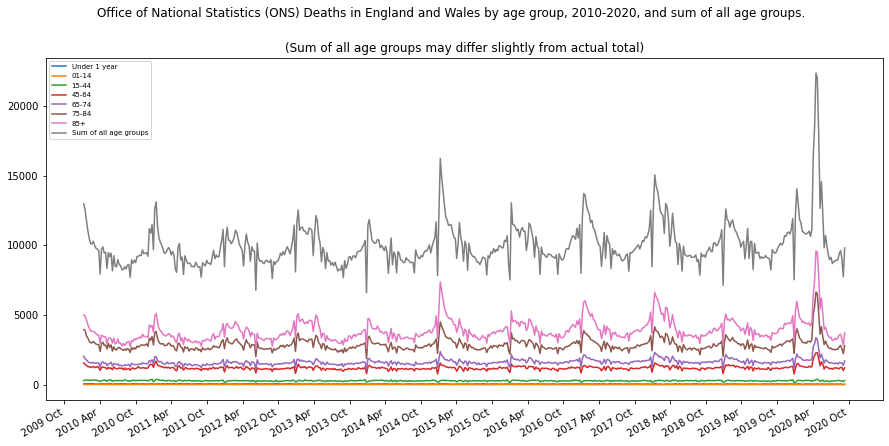

In [12]:

fig, ax = plt.subplots(figsize=(15, 7))
df_2010_2020.plot(ax=ax)
ax.patch.set_alpha(1)
fig.patch.set_alpha(1)

plt.suptitle("Office of National Statistics (ONS) Deaths in England and Wales by age group, 2010-2020, and sum of all age groups.")
plt.title("(Sum of all age groups may differ slightly from actual total)")

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.legend(loc=2, prop={'size': 7})

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

plt.savefig("ONS_2010_2020_deaths_by_age.png", papertype='a4')
plt.show()